# Multi-output Decisioin Tree Regression
reference:[Multi-output Decision Tree Regreesion](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression_multioutput.html#sphx-glr-auto-examples-tree-plot-tree-regression-multioutput-py)

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor

## 生成数据集
1. np.random.Randomstate(1)：设置随机数种子
2. X为100行1列的矩阵，值域为(-100,100)
3. Y为100行2列的矩阵，值域为[(-1,1),(-1,1)]
4. 同时为Y添加了随机噪声(-0.5,0.5),噪声的占比为20%

In [6]:
# Create a random dataset
# 生成随机数据集,random_state=1 是随机数种子，保证每次生成的随机数一样
rng = np.random.RandomState(1)
# 生成100个随机数，每个随机数是一个一维数组，数组中的元素是0-1之间的随机数,rand(100,1)生成100行1列的随机数
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
# ravel()将多维数组降为一维数组,生成一个二维数组，每个数组中有两个元素，第一个元素是sin(x),第二个元素是cos(x)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
#给数据集添加噪声，每隔5个数据添加一个噪声，噪声的值值域(-0.5,0.5)
y[::5, :] += 0.5 - rng.rand(20, 2)

## 训练模型，并根据模型预测
[传送门：DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)
- 回归深度 max_depth:决策树的最大深度

In [7]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)
# Predict
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

## 可视化
[传送门：scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter)
- matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, linewidths=None, *, edgecolors=None)

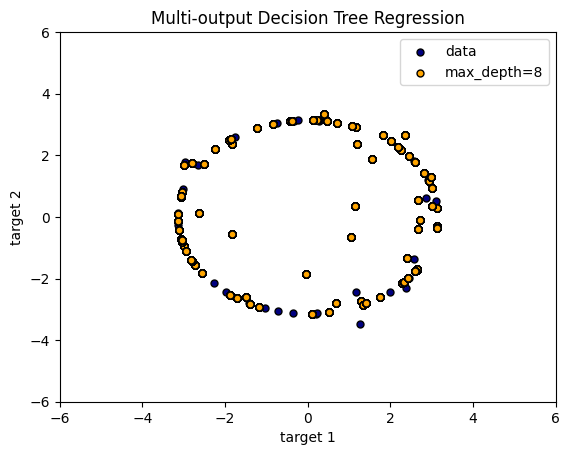

In [13]:

# Plot the results
plt.figure()
s = 25

plt.scatter(y[:, 0], y[:, 1], c="navy", s=s, edgecolor="black", label="data")
plt.scatter(y_1[:, 0],y_1[:, 1],c="cornflowerblue",s=s,edgecolor="black",label="max_depth=2")
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s, edgecolor="black", label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange", s=s, edgecolor="black", label="max_depth=8")

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()
